<a href="https://colab.research.google.com/github/Mhuna91/10-08-2022_Assignment/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd

In [17]:
import pandas as pd
import io

dataset = pd.read_csv(io.BytesIO(uploaded['Restaurant_Reviews (2).tsv']), delimiter='\t')


In [18]:
dataset.shape

(1000, 2)

In [19]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


DATA CLEANING

In [20]:
dataset.isnull().sum()


,0
Review,0
Liked,0


In [21]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
ps = PorterStemmer()
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])  # Keep only letters
    review = review.lower()  # Lowercase
    review = review.split()  # Tokenize
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
dataset['Cleaned_Review'] = corpus
dataset.head()


,Review,Liked,Cleaned_Review
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price


DATA TRANSFORMATION
Apply Bag of Words (Using CountVectorizer)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)  # Use top 1500 frequent words
X = cv.fit_transform(corpus).toarray()   # Features (input)
y = dataset['Liked'].values              # Labels (target)


In [24]:
print(X.shape)  # (num_samples, num_features)
print(X[0])     # First transformed review
print(y[:5])    # First 5 labels


(1000, 1500)
[0 0 0 ... 0 0 0]
[1 0 0 1 1]


TF-IDF Version
If you prefer TF-IDF instead of raw counts:

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1500)
X = tfidf.fit_transform(corpus).toarray()


**Train-Test Split (For Modeling)**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scaling (If Required by Model)
For models like SVM, you may want to scale the data:

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)  # Sparse matrix doesn't support mean-centering
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Train Naive Bayes Classifier

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.685

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68        96
           1       0.70      0.68      0.69       104

    accuracy                           0.69       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.69      0.69      0.69       200



Visualize Model Performance
 1. Confusion Matrix

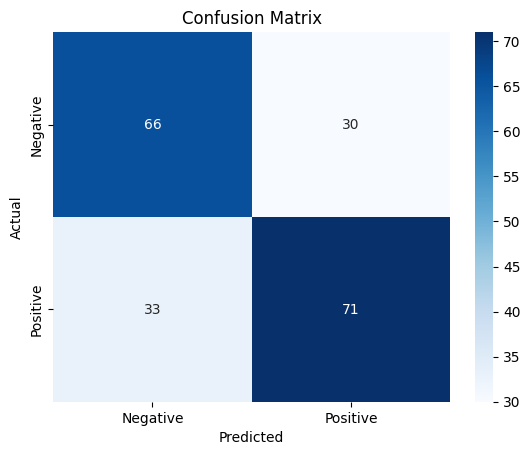

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 Accuracy Bar Chart

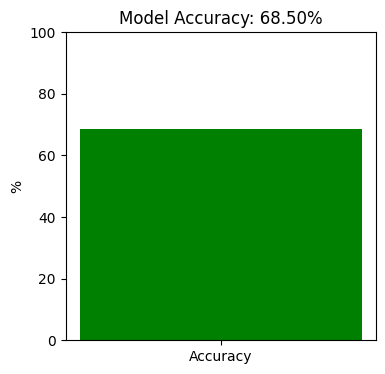

In [30]:
accuracy = accuracy_score(y_test, y_pred) * 100

plt.figure(figsize=(4, 4))
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim(0, 100)
plt.title(f'Model Accuracy: {accuracy:.2f}%')
plt.ylabel('%')
plt.show()


Basic Sentiment Analysis Function
Now that my model is trained, i will create a function to analyze new reviews:

In [31]:
def predict_sentiment(text):
    # Clean the input
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)

    # Vectorize using the same CountVectorizer (cv)
    vector = cv.transform([review]).toarray()

    # Predict
    prediction = model.predict(vector)[0]
    sentiment = 'Positive 😊' if prediction == 1 else 'Negative 😠'
    return sentiment


In [32]:
print(predict_sentiment("I love this food!"))       # Positive
print(predict_sentiment("Worst meal ever."))        # Negative


Positive 😊
Negative 😠
